In [1]:
#imports the necessary libraries for data manipulation, visualization, and analysis.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

!pip install missingno
import missingno as msno

In [2]:
# Read the auto-mpg dataset
df_auto_mpg = pd.read_csv("C:\\Users\\tasweemb\\Documents\\Machine Learning Module\\Datasets\\Auto\\auto-mpg.csv")


In [3]:
# First 5 rows and 5 last rows
df_auto_mpg_head = df_auto_mpg.head()
df_auto_mpg_tail = df_auto_mpg.tail()

df_auto_mpg_head, df_auto_mpg_tail

(    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
 0  18.0          8         307.0        130    3504          12.0          70   
 1  15.0          8         350.0        165    3693          11.5          70   
 2  18.0          8         318.0        150    3436          11.0          70   
 3  16.0          8         304.0        150    3433          12.0          70   
 4  17.0          8         302.0        140    3449          10.5          70   
 
    origin                   car name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  ,
       mpg  cylinders  displacement horsepower  weight  acceleration  \
 393  27.0          4         140.0         86    2790          15.6   
 394  44.0          4          97.0         52    2130          24.6   
 395  32.0          4         135.0         84   

Overview of the dataset:

mpg: Miles per gallon
cylinders: Number of cylinders in the vehicle
displacement: Engine displacement (cubic inches)
horsepower: Horsepower of the vehicle. It appears to be of type string, which suggests there might be some non-numeric values.
weight: Weight of the vehicle
acceleration: Acceleration (seconds to reach 60 mph)
model year: Model year of the vehicle
origin: Origin of the car (1: America, 2: Europe, 3: Asia)
car name: Name of the car


In [4]:
#number of rows and columns in the dataset.
df_auto_mpg.shape

(398, 9)

In [5]:
# Display basic statistics, first few rows, and last few rows
df_auto_mpg_description = df_auto_mpg.describe()

df_auto_mpg_description

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
numeric_features = df_auto_mpg.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [7]:
categorical_features = df_auto_mpg.select_dtypes(include=[object])


categorical_features.columns

Index(['horsepower', 'car name'], dtype='object')

In [8]:
# Check for missing values in the dataset
missing_values = df_auto_mpg.isnull().sum()

missing_values


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

There are no missing values in the dataset

In [9]:
# Calculate skewness and kurtosis for the dataset
skewness = df_auto_mpg.skew(numeric_only=True)
kurtosis = df_auto_mpg.kurt(numeric_only=True)

skewness, kurtosis


(mpg             0.457066
 cylinders       0.526922
 displacement    0.719645
 weight          0.531063
 acceleration    0.278777
 model year      0.011535
 origin          0.923776
 dtype: float64,
 mpg            -0.510781
 cylinders      -1.376662
 displacement   -0.746597
 weight         -0.785529
 acceleration    0.419497
 model year     -1.181232
 origin         -0.817597
 dtype: float64)

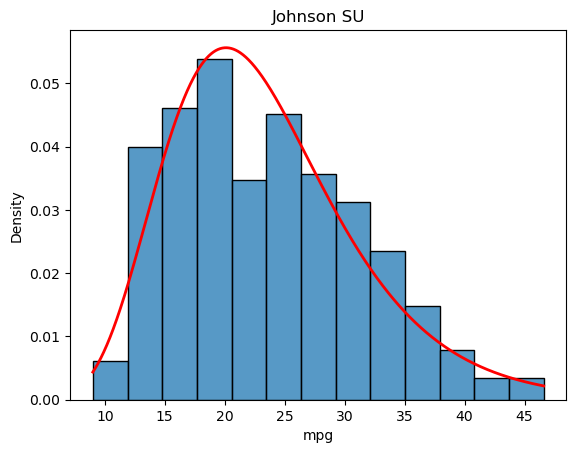

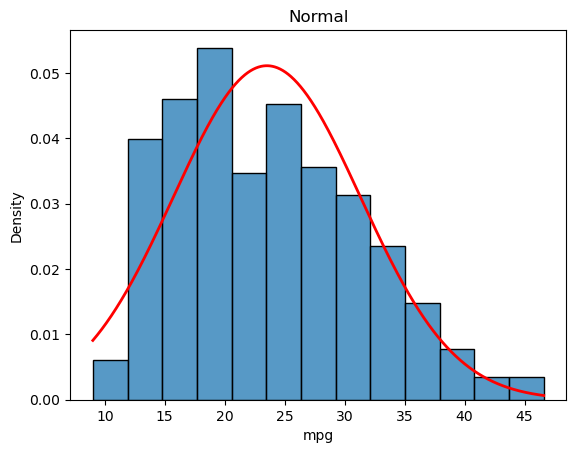

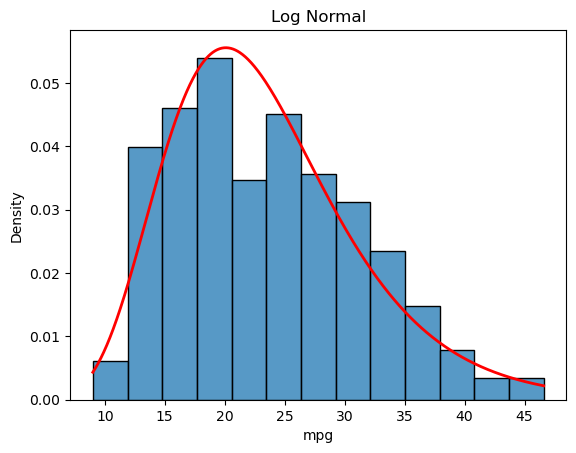

In [10]:
y = df_auto_mpg['mpg']

# Johnson SU
plt.figure(1); plt.title('Johnson SU')
sns.histplot(y, kde=False, stat="density", common_norm=False)
x = np.linspace(min(y), max(y), 1000)
pdf = st.johnsonsu(*st.johnsonsu.fit(y)).pdf(x)
plt.plot(x, pdf, 'r-', lw=2)

# Normal
plt.figure(2); plt.title('Normal')
sns.histplot(y, kde=False, stat="density", common_norm=False)
pdf = st.norm(*st.norm.fit(y)).pdf(x)
plt.plot(x, pdf, 'r-', lw=2)

# Log Normal
plt.figure(3); plt.title('Log Normal')
sns.histplot(y, kde=False, stat="density", common_norm=False)
pdf = st.lognorm(*st.lognorm.fit(y)).pdf(x)
plt.plot(x, pdf, 'r-', lw=2)

plt.show()

In [11]:
correlation = numeric_features.corr()
print(correlation['mpg'].sort_values(ascending = False),'\n')

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64 



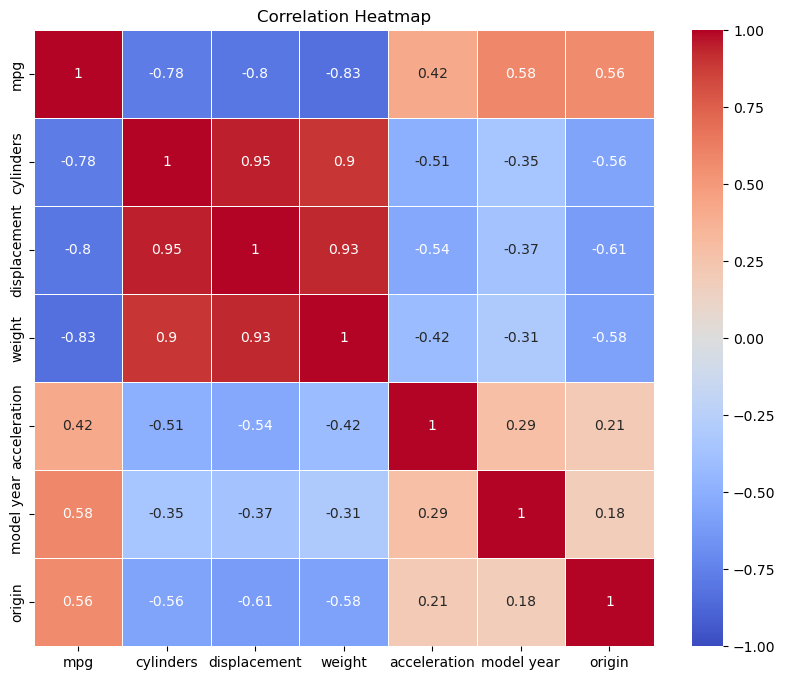

In [12]:
# Compute the correlation matrix for numerical variables only
correlation_matrix = df_auto_mpg.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


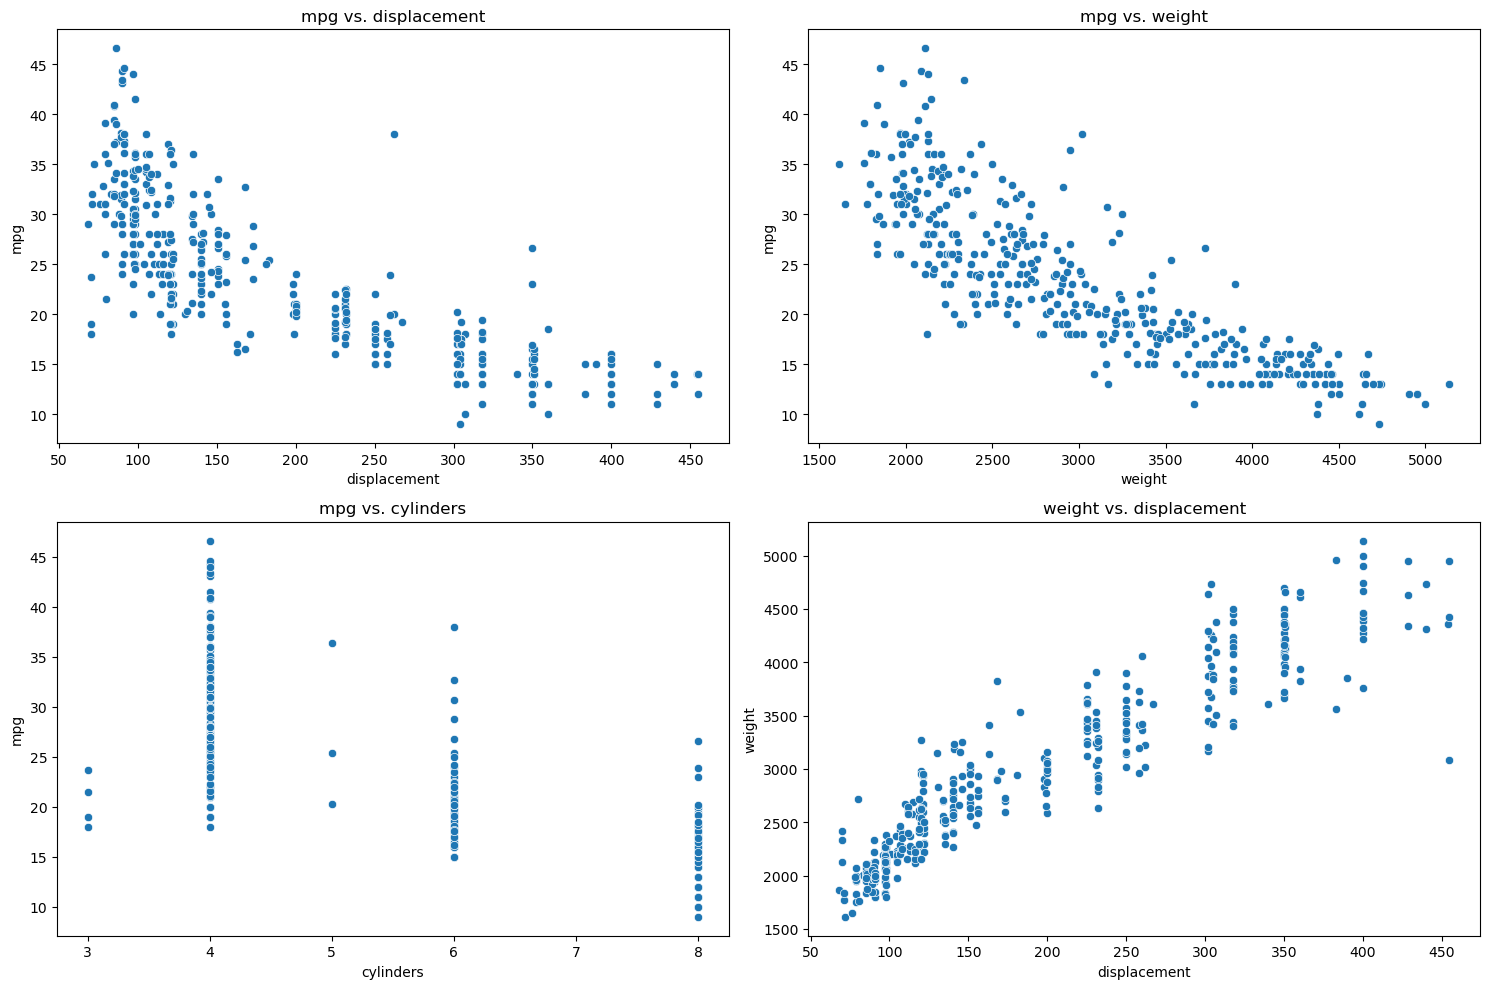

In [13]:
# Plotting scatter plots again for the selected pairs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# mpg vs. displacement
sns.scatterplot(x='displacement', y='mpg', data=df_auto_mpg, ax=axs[0, 0])
axs[0, 0].set_title('mpg vs. displacement')

# mpg vs. weight
sns.scatterplot(x='weight', y='mpg', data=df_auto_mpg, ax=axs[0, 1])
axs[0, 1].set_title('mpg vs. weight')

# mpg vs. cylinders
sns.scatterplot(x='cylinders', y='mpg', data=df_auto_mpg, ax=axs[1, 0])
axs[1, 0].set_title('mpg vs. cylinders')

# weight vs. displacement
sns.scatterplot(x='displacement', y='weight', data=df_auto_mpg, ax=axs[1, 1])
axs[1, 1].set_title('weight vs. displacement')

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
# Applying the logic to the auto-mpg dataset again
for column_name in df_auto_mpg.columns:
    if df_auto_mpg[column_name].dtypes == 'object':
        df_auto_mpg[column_name] = df_auto_mpg[column_name].fillna(df_auto_mpg[column_name].mode().iloc[0])
        unique_category = len(df_auto_mpg[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))


Feature 'horsepower' has '94' unique categories
Feature 'car name' has '305' unique categories


In [15]:
# Replace 'horsepower' values with numerical values
df_auto_mpg['horsepower'] = df_auto_mpg['horsepower'].astype('category').cat.codes

# Replace 'car name' values with numerical values
df_auto_mpg['car name'] = df_auto_mpg['car name'].astype('category').cat.codes

# Display the updated dataset
df_auto_mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161
